## Gradient Boosted Tree -  Regression

### Logic

In boosting, instead of growing K trees in parallel, we iteratively optimize the values of y^i by adding a new function of regression tree in each round.

$y^{(0)}_i=f^{(0)}(x_i)=0$

$y^{(1)}_i=f^{(0)}(x_i)+f^{(1)}(x_i)=y^{(0)}_i+f^{(1)}(x_i)$

$y^{(2)}_i=f^{(0)}(x_i)+f^{(1)}(x_i)+f^{(2)}(x_i)=y^{(2)}_i+f^{(2)}(x_i)$

$y^{(t)}_i=f^{(0)}(x_i)+f^{(1)}(x_i)+...+f^{(t)}(x_i)=y^{(t−1)}_i+f^{(t)}(x_i)$

* Pseudo-Residuals :

Pseudo-residuals are calculated like this – you calculate the gradient of your loss function with respect to your predicted values, and you multiply them by -1. You then use these values as target inputs to a weak learner.

In [7]:
import pandas as pd
import seaborn as sns
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import random
import statistics 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
sns.set()

In [49]:
def weak_regressor(x, y, max_depth = 1):
    reg = DecisionTreeRegressor(max_depth = max_depth)
    reg.fit(x, y)
    return reg
    
def cost_calculate(y_true, y_pred):
    # Returns MSE Cost
    return np.sqrt(np.sum(np.square(y_true - y_pred)))

def cost_gradient(y_true, y_pred):
    return -(y_true-y_pred)

In [69]:
def gradient_boosted_tree(orig_dataset, features, target, n_iter = 100, learning_rate = 1, max_depth_weak_regressor = 3):
    dataset = orig_dataset.copy()
    y = dataset[target]
    
    y_pred = [0] * len(y)
    cost = cost_calculate(y, y_pred)
    
    cost_prev = np.inf
    for i in range(int(n_iter)):
        
        residual = -cost_gradient(y, y_pred)
        
        weak_reg = weak_regressor(dataset[features], residual, max_depth = max_depth_weak_regressor)
        predictions = weak_reg.predict(dataset[features])
        y_pred = y_pred + (learning_rate * predictions)
        
        cost = cost_calculate(y, y_pred)
        
        if cost_prev - cost < 1e-6:
            break
            
    return(y_pred)

### Low Dimension Data

In [70]:
dataset = pd.read_csv('01. Linear Regression Dataset.csv')
dataset.dropna(inplace=True)

In [71]:
y_pred = gradient_boosted_tree(dataset, ['x'], 'y')
dataset['y_pred'] = y_pred

In [72]:
print('R2 Score: ', r2_score(dataset['y'], y_pred))
print('MSE: ', mean_squared_error(dataset['y'], y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(dataset['y'], y_pred)))
print('MAE: ', mean_absolute_error(dataset['y'], y_pred))

R2 Score:  0.9921109597707204
MSE:  6.67518748013377
RMSE:  2.583638419000184
MAE:  2.0452121382755233


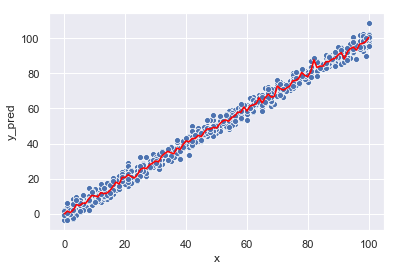

In [73]:
fig, ax = plt.subplots()
sns.scatterplot(x = 'x', y='y', data=dataset, ax=ax)
sns.lineplot(x = 'x', y='y_pred', data=dataset, ax=ax, color='red')
plt.show()

### Boston Dataset

In [74]:
boston_dataset = pd.DataFrame(load_boston()['data'], columns = load_boston()['feature_names'])
boston_dataset['target'] = load_boston()['target']

In [75]:
y_pred = gradient_boosted_tree(boston_dataset, boston_dataset.drop(columns = 'target').columns, 'target')
boston_dataset['y_pred'] = y_pred

In [76]:
print('R2 Score: ', r2_score(boston_dataset['target'], y_pred))
print('MSE: ', mean_squared_error(boston_dataset['target'], y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(boston_dataset['target'], y_pred)))
print('MAE: ', mean_absolute_error(boston_dataset['target'], y_pred))

R2 Score:  0.9997912735433869
MSE:  0.017620594825328142
RMSE:  0.13274258858907395
MAE:  0.09655273059998104
